In [1]:
import sys 
sys.path.append("..") 
import os
import itertools

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Artin's topological equivalence relation 1

In [43]:
n_band = 5
braid_operators_list = [BraidOperator(1), BraidOperator(2), BraidOperator(4), BraidOperator(3)]
model0 = obtain_model_braid(n_band=n_band, braid_operators=braid_operators_list)

show_braid_words(model0.get_braid_words())

$\sigma_1$ $\sigma_2$ $\sigma_4$ $\sigma_3$ 

In [44]:
operator_cases = list(itertools.permutations(range(len(braid_operators_list)), len(braid_operators_list)))
models = [obtain_model_braid(n_band=n_band, braid_operators=[braid_operators_list[i] for i in case]) for case in operator_cases]
braid_operator_list_gen = [[braid_operators_list[i] for i in case] for case in operator_cases]
print("The number of braids: ", len(braid_operator_list_gen))

The number of braids:  24


In [45]:
n_core = 16 # the numebr of cores used in computation
func = partial(similarity_function, perturbations=perturbations)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Centers:  [4, 6, 0, 3, 7, 20, 1, 17]
The number of samples:  [5, 5, 3, 3, 3, 3, 1, 1]


In [46]:
for index, model in enumerate([models[index] for index in center_indices]):
    print("Center {index}: similarity = {value}".format(index=index, value=func(model, model0)))

Center 0: similarity = 0
Center 1: similarity = 0
Center 2: similarity = 1
Center 3: similarity = 0
Center 4: similarity = 0
Center 5: similarity = 0
Center 6: similarity = 0
Center 7: similarity = 0


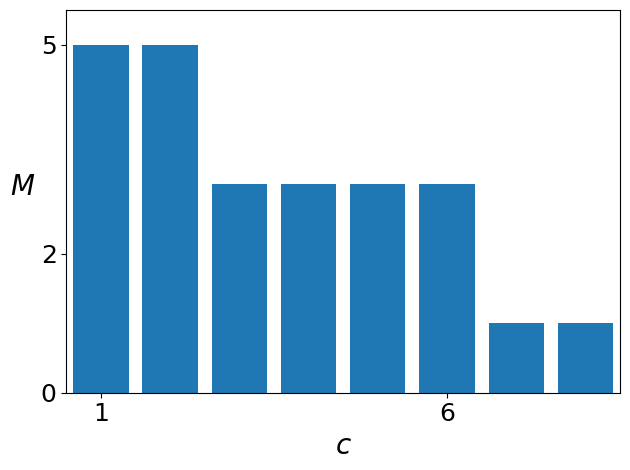

In [47]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 5))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('Artin1.svg')

In [50]:
print("Origin : ")
show_braid_words(model0.get_braid_words())
print("---------------")

index = 0
for model in [models[index] for index in groups[index]]:
    show_braid_words(model.get_braid_words())
    #print(model.get_winding_matrix())

Origin : 


$\sigma_1$ $\sigma_2$ $\sigma_4$ $\sigma_3$ 

---------------


$\sigma_1$ $\sigma_3$ $\sigma_2$ $\sigma_4$ 

$\sigma_1$ $\sigma_3$ $\sigma_4$ $\sigma_2$ 

$\sigma_3$ $\sigma_1$ $\sigma_2$ $\sigma_4$ 

$\sigma_3$ $\sigma_1$ $\sigma_4$ $\sigma_2$ 

$\sigma_3$ $\sigma_4$ $\sigma_1$ $\sigma_2$ 

# Save data

In [29]:
directory_name = 'Artin'
with open('./fig2/{directory_name}/Artin1_group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [30]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/Artin1_{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Artin's topological equivalence condition 2

In [89]:
n_band = 3
braid_operator_list = [BraidOperator(1), BraidOperator(2),  BraidOperator(1), BraidOperator(2), BraidOperator(1)]
model0 = obtain_model_braid(n_band=n_band, braid_operators=braid_operator_list)

show_braid_words(model0.get_braid_words())

$\sigma_1$ $\sigma_2$ $\sigma_1$ $\sigma_2$ $\sigma_1$ 

In [26]:
# operator_cases = list(itertools.permutations(range(len(braid_operators_list)), len(braid_operators_list)))
# models = [obtain_model_braid(n_band=n_band, braid_operators=[braid_operators_list[i] for i in case]) for case in operator_cases]
# braid_operator_list_gen = [[braid_operators_list[i] for i in case] for case in operator_cases]

n_band = 4
braid_operator_list = [BraidOperator(1), BraidOperator(2), BraidOperator(3), 
                       BraidOperator(1, True), BraidOperator(2, True), BraidOperator(3, True)]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_all_combination_generate_sample(3)
print("The number of braids: ", len(braid_operator_list_gen))
# for operator_list in braid_operator_list_gen[:3]:
#     show_braid_words(operator_list)

The number of braids:  216


In [27]:
n_core = 64 # the numebr of cores used in computation
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Centers:  [23, 21, 3, 15, 19, 22, 14, 143, 87, 131, 5, 93, 2, 35, 91, 49, 167, 142, 83, 51, 52, 58, 59, 67, 70, 160, 159, 41, 40, 31, 178, 117, 6, 135, 101, 9, 38, 16, 13, 27, 139, 94, 149, 34, 24, 146, 137, 136, 134, 144, 172, 165, 168, 170, 171, 173, 179, 186, 187, 189, 204, 207, 208, 211, 158, 130, 0, 127, 1, 4, 7, 8, 11, 26, 28, 29, 36, 42, 43, 44, 45, 47, 129, 50, 71, 78, 79, 81, 214, 85, 86, 88, 96, 99, 100, 115, 116, 119, 57, 215]
The number of samples:  [13, 13, 13, 13, 11, 11, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


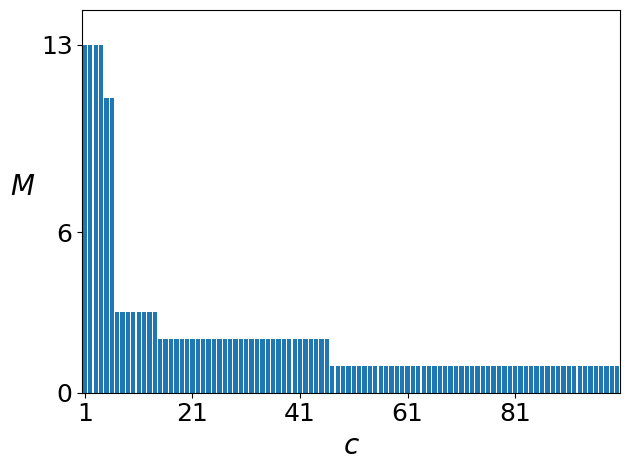

In [36]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 20))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('Artin2.svg')

In [54]:
index = 15
for model in [models[index] for index in groups[index]]:
    show_braid_words(model.get_braid_words())
    #print(model.get_winding_matrix())

$\sigma_2$ $\sigma_3$ $\sigma_2$ 

$\sigma_3$ $\sigma_2$ $\sigma_3$ 

# Save data

In [29]:
directory_name = 'Artin'
with open('./fig2/{directory_name}/Artin2_group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [30]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/Artin2_{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Artin's topological equivalence condition

In [2]:
n_band = 3
braid_operator_list = [BraidOperator(1), BraidOperator(2),  BraidOperator(1), BraidOperator(2), BraidOperator(1)]
model0 = obtain_model_braid(n_band=n_band, braid_operators=braid_operator_list)

show_braid_words(model0.get_braid_words())

$\sigma_1$ $\sigma_2$ $\sigma_1$ $\sigma_2$ $\sigma_1$ 

In [3]:
n_band = 3
braid_operator_list = [BraidOperator(1), BraidOperator(2),  BraidOperator(1, True), BraidOperator(2, True)]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_random_generate_sample(100, n_max_operator=6)
print("The number of braids: ", len(braid_operator_list_gen))
for operator_list in braid_operator_list_gen[:3]:
    show_braid_words(operator_list)

The number of braids:  100


$\sigma^{-1}_1$ $\sigma_2$ 

$\sigma^{-1}_1$ $\sigma^{-1}_2$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_2$ $\sigma^{-1}_2$ 

In [4]:
n_core = 32 # the numebr of cores used in computation
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Centers:  [10, 13, 5, 11, 0, 6, 30, 3, 1, 19, 54, 88, 2, 15, 16, 21, 53, 26, 72, 66, 70, 75, 7, 79, 82, 84, 89, 77, 86, 37, 47, 46, 4, 36, 35, 92, 29, 25, 23, 9, 8, 58, 99]
The number of samples:  [11, 9, 8, 7, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


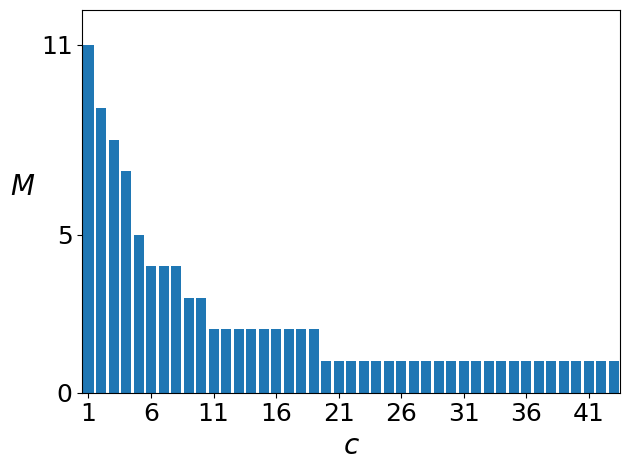

In [5]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 5))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('Artin2.svg')

In [7]:
index = 0
for model in [models[index] for index in groups[index]]:
    show_braid_words(model.get_braid_words())
    #print(model.get_winding_matrix())

$\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_2$ 

$\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_2$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_2$ $\sigma^{-1}_2$ $\sigma_2$ 

In [16]:
index = 10
for model in [models[index] for index in groups[index]]:
    show_braid_words(model.get_braid_words())

$\sigma_1$ $\sigma_2$ $\sigma_1$ 

$\sigma_2$ $\sigma_1$ $\sigma_2$ 